<a href="https://colab.research.google.com/github/akkikam/akkikam/blob/main/Netflix_Movies(Data%20Visualization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px

In [2]:
df = pd.read_csv('netflix_titles.csv')
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix = pd.read_csv('netflix_titles.csv')
netflix["date_added"]=pd.to_datetime(netflix["date_added"].str.strip(), format="%B %d, %Y")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [7]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


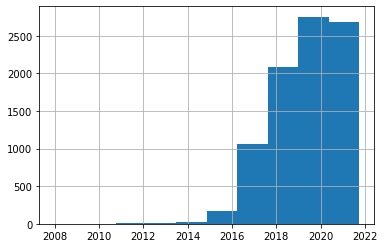

In [8]:
netflix["date_added"].hist() #matplotlib version

In [9]:
px.histogram(netflix, x="release_year")

In [10]:
netflix[netflix["release_year"] == 1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [11]:
### Extract Month from date_added

netflix["date_added_month"] = netflix["date_added"].dt.month.fillna(0)
netflix["date_added_day"] = netflix["date_added"].dt.day.fillna(0)

In [12]:
px.histogram(netflix, x="date_added", color="date_added_month") # Histogram of date

In [13]:
px.histogram(netflix, x="date_added_month", color="type") 

In [14]:
px.histogram(netflix, x="date_added_day", color="type")  #graph shows Netflix release most shows/movie on the first date of the month

In [15]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_month', 'date_added_day'],
      dtype='object')

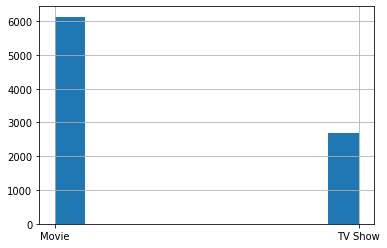

In [16]:
netflix["type"].hist()

In [17]:
netflix["country"].str.split(",", expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [18]:
country_count = netflix.copy()
country_count = pd.concat([country_count, netflix["country"].str.split(",", expand=True, )], axis=1)
country_count = country_count.melt(id_vars=["type", "title"], value_vars=range(12), value_name="Country")
country_count = country_count[country_count["Country"].notna()]
country_count["Country"] = country_count["Country"].str.strip()
country_count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [19]:
px.histogram(country_count, "Country", color="type").update_xaxes(categoryorder="total descending")

In [20]:
px.histogram(netflix, "rating").update_xaxes(categoryorder="total descending")

In [21]:
netflix["Cast Count"] = netflix["cast"].str.split(",")
netflix = netflix[netflix["Cast Count"].notna()]
netflix["Cast Count"] = netflix["Cast Count"].apply(lambda x: len(x))
netflix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,Cast Count
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24.0,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24.0,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24.0,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9.0,24.0,16
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0,24.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3.0,9.0,6
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,20.0,10
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,1.0,7
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,11.0,9


In [22]:
px.histogram(netflix, "Cast Count").update_xaxes(categoryorder="total descending")

In [23]:
df = df.dropna()

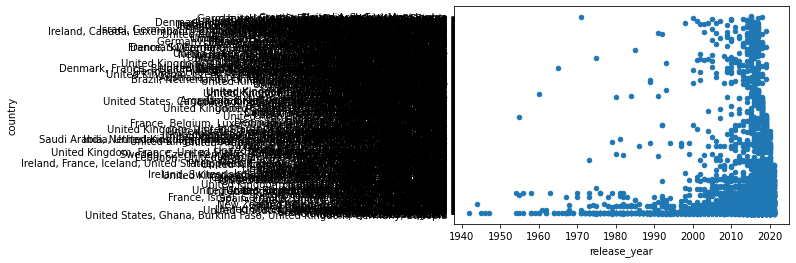

In [24]:
df.plot.scatter(x="release_year", y="country")

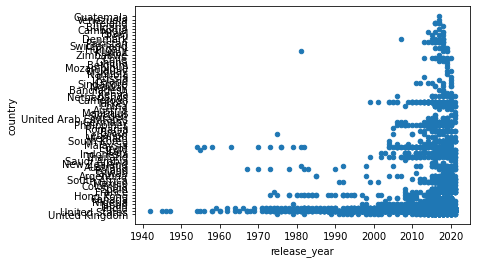

In [26]:
df[~df['country'].str.contains(',')].plot.scatter(x="release_year", y="country")

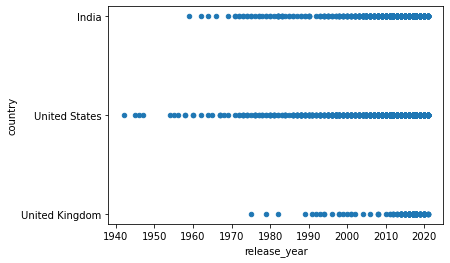

In [27]:
countries_of_interest = ['India', 'United Kingdom', 'Czech Republic', 'United States']
df[df['country'].isin(countries_of_interest)].plot.scatter(x="release_year", y="country")

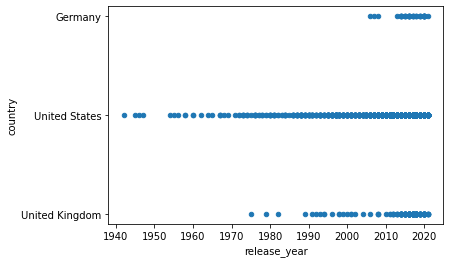

In [28]:
countries_of_interest = ['Germany', 'United Kingdom', 'Czech Republic', 'United States']
df[df['country'].isin(countries_of_interest)].plot.scatter(x="release_year", y="country")